In [1]:
from new_basis_llp_qaoa.statevector_sim import CYPStateVector 
from new_basis_llp_qaoa.statevector_sim.cyp_statevector_sim import CYPStatevectorSim
import numpy as np
from matplotlib import pyplot as plt

((array([205., 528., 616., 204.,  38.,  16.,   4.,   2.,   0.,   2.]),
  array([1.57856680e-04, 7.51128626e-02, 1.50067868e-01, 2.25022874e-01,
         2.99977880e-01, 3.74932886e-01, 4.49887892e-01, 5.24842898e-01,
         5.99797904e-01, 6.74752910e-01, 7.49707915e-01]),
  <BarContainer object of 10 artists>),
 0.9955138888888889)

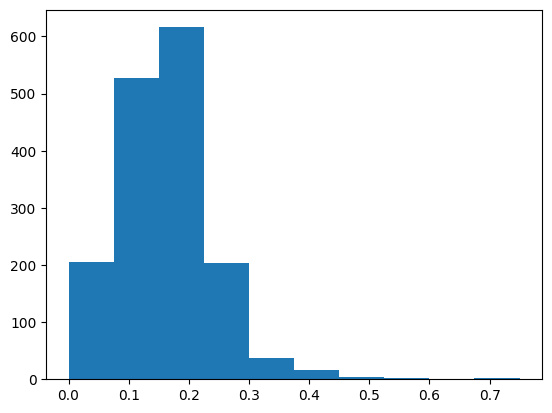

In [2]:
from scipy import sparse
# Q-Learning values. (Discounted Payoff action is in first column).
Qs = sparse.load_npz('data/Qs.npz').toarray()

# Association matrix
As = sparse.load_npz('data/As.npz').toarray()

# Provision constraints
Ls = sparse.load_npz('data/Ls.npz').toarray()

res = []
for j in As:
    for i in j:
        if np.abs(i) > 0.0000000001:
            res.append(i)
plt.hist(res), 1 - len(res)/600**2

In [58]:

from scipy import sparse
# Q-Learning values. (Discounted Payoff action is in first column).
Qs = sparse.load_npz('data/Qs.npz').toarray()

# Association matrix
As = sparse.load_npz('data/As.npz').toarray()

# Provision constraints
Ls = sparse.load_npz('data/Ls.npz').toarray()



In [59]:
Qs_with_4_actions = Qs[:,:4]
Ls_with_4_actions = Qs[:,:4]

In [60]:
# pick 100 and check if the picked has non zero value at indices outside index subset

In [61]:
from tqdm import tqdm
bad_indices_list = []
size = 599
for seed in tqdm(range(100)):
    np.random.seed(seed)
    index_subset = set(np.random.choice(range(600), size, replace=False))
    bad_indices = 0
    for i in index_subset:
        row = As[i]
        for j, entry in enumerate(row):
            if entry > 0 and j not in index_subset:
                bad_indices += 1
                break
    bad_indices_list.append(bad_indices)

100%|██████████| 100/100 [00:02<00:00, 36.56it/s]


In [62]:
sorted(bad_indices_list)[0]

1

In [65]:
import networkx as nx
G : nx.Graph = nx.from_numpy_array(As)
connected_components = list(nx.connected_components(G))
for graph in connected_components:
    print(len(graph))


594
1
1
1
2
1


In [72]:
s_G : nx.Graph = G.subgraph(connected_components[0])
new_As = nx.to_numpy_array(s_G)

In [73]:
from ibmq_utils import generate_random_dataset

G = nx.from_numpy_array(As)
connected_components = list(nx.connected_components(G))

# Count the number of connected components
num_connected_components = len(connected_components)

# Print the result
print("Number of connected components:", num_connected_components)



Number of connected components: 6


In [75]:

from tew_code.qtft_tools import DC_QAOA
m = DC_QAOA(Qs_with_4_actions[:594], new_As, 1.0, 1, 1, 5)
m.set_communities()




RecursionError: maximum recursion depth exceeded in comparison

In [81]:
(2**10) **2

1048576